<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/SVMNonLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Impoer library yang diperlukan
import numpy as np #operasi matematika dalam bentuk array
import pandas as pd ##preprocessing dan data analisis
from sklearn.model_selection import train_test_split #memisahkan dataset menjadi data test dan data train 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer #mengonversi kumpulan dokumen teks menjadi vektor dan memberi bobot
from sklearn.svm import SVC #membuat model SVC
from gensim import parsing #parsing text
from sklearn.pipeline import Pipeline #membuat objek
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report #melakukan evaluasi model
import chardet #mendeteksi pengkodean

In [2]:
#Membaca dataset
with open('setdata.csv', 'rb') as f:
  result = chardet.detect(f.read())

df = pd.read_csv('setdata.csv', encoding = result['encoding'])
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#Menghitung Panjang Dataset
df.shape

(5572, 5)

In [4]:
#Melihat info dan deskripsi dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
#Preprocessing kolom
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df['v1'] = df.v1.map({'ham':0, 'spam':1})
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [6]:
#Preprocessing data
print("Sebelum Preprocessing")
print(df.isnull().sum()) #Menampilkan jumlah data yang bernilai null untuk masing-masing kolom
df=df.dropna(axis=0) #Menghapus data yang bernilai null
print("\nSetelah Preprocessing")
print(df.isnull().sum()) #Menampilkan jumlah data yang bernilai null untuk masing-masing kolom

Sebelum Preprocessing
v1    0
v2    0
dtype: int64

Setelah Preprocessing
v1    0
v2    0
dtype: int64


In [7]:
#Menghitung nilai untuk masing-masing kemungkinan spam atau ham
df.v1.value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [8]:
#Wisualisasi data untuk nilai ham dan spam
import plotly.offline as py
import plotly.graph_objs as go

random_color = list(np.random.choice(range(255), size=3))

species_count = df['v1'].value_counts()
dfp = [go.Bar(
    x = species_count.index,
    y = species_count.values,
    marker = dict(color = random_color)
)]

py.iplot(dfp)

In [9]:
#Melakukan parsing text untuk nilai string
def parse(s):
  parsing.stem_text(s)
  return s

for i in range(0, len(df)):
  df.iloc[i,1] = parse(df.iloc[i,1])
  df.iloc[i,1] = df.iloc[i,1].lower()
X,y = df['v2'].tolist(), df['v1'].tolist()

#Membagi dataset menjadi data test dan data training dengan perbandingan 20:80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
#Membuat model SCV Non Linear dengan kernel polynomial
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel = 'poly'))])
text_clf

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(kernel='poly'))])

In [11]:
#menghasilkan parameter model pembelajaran dari data pelatihan
text_clf.fit(X_train, y_train)

#membuat prediksi dari dataset
y_red = text_clf.predict(X_test)
y_red

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
#Menghitung skor akuraasi
print("Akurasi Skor : ", accuracy_score(y_test, y_red))

Akurasi Skor :  0.9497757847533632


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       979
           1       1.00      0.59      0.74       136

    accuracy                           0.95      1115
   macro avg       0.97      0.79      0.86      1115
weighted avg       0.95      0.95      0.94      1115



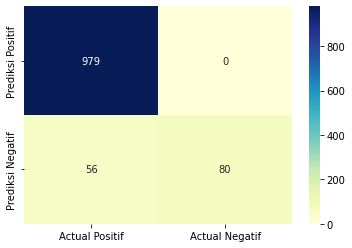

In [13]:
#Menghitung confusion matriks
cm = confusion_matrix(y_test, y_red)

#membuat clasifikasi report
print(classification_report(y_test, y_red))

#Membuat visualisasi untuk confusion matriks
import seaborn as sns
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positif', 'Actual Negatif'],
                                    index = ['Prediksi Positif', 'Prediksi Negatif'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [14]:
#Membuat nilai probabilitas dari svm untuk digunakan pada evaluasi ROC
random_probs = [0 for _ in range(len(y_test))]
svm_probs = text_clf.predict(X_test)
svm_probs

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
#Menghitung nilai ROC dan AUCROC
random_auc = roc_auc_score(y_test, random_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

print('Random Prediction : AUCROC = %.3f' % (random_auc))
print('SVM = %.3f' % (svm_auc))

Random Prediction : AUCROC = 0.500
SVM = 0.794


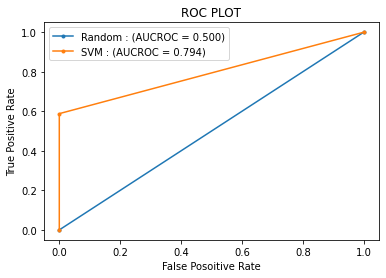

In [16]:
#Membuat kurva dari ROC sebagai model evaluasi SVM
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

import matplotlib.pyplot as plt
plt.plot(random_fpr, random_tpr, marker=".", label = "Random : (AUCROC = %.3f)" % random_auc)
plt.plot(svm_fpr, svm_tpr, marker=".", label = "SVM : (AUCROC = %.3f)" % svm_auc)

plt.title("ROC PLOT")
plt.xlabel("False Posoitive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()